# PCA and Clustering
For this worksheet, we will load the standard iris dataset from sklearn. https://archive.ics.uci.edu/ml/datasets/iris

In [6]:
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()

In [7]:
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [18]:
iris.data.shape

(150, 4)

We can't easily plot 4 dimensions, so we'll use PCA to make them 2 dimensions.

## PCA
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [17]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2)
????

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
pca_data = ????

What is the size of our new data?

In [22]:
pca_data.shape

(150, 2)

What about the rest of the model?

In [23]:
pca.get_covariance()

array([[ 0.67919741, -0.03258618,  1.27066452,  0.5321852 ],
       [-0.03258618,  0.18113034, -0.31863564, -0.13363564],
       [ 1.27066452, -0.31863564,  3.11934547,  1.28541527],
       [ 0.5321852 , -0.13363564,  1.28541527,  0.58961806]])

In [26]:
pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557])

In [31]:
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [28]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [29]:
pca.singular_values_

array([ 25.08986398,   6.00785254])

### And now we plot

In [38]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(0,0.5,'PC2')

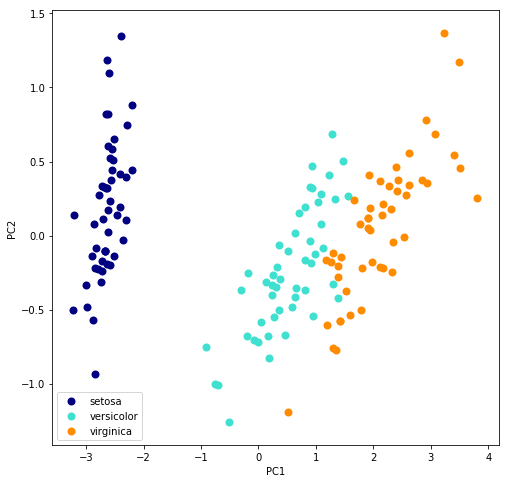

In [42]:
import matplotlib.pyplot as plt
colors = ['navy', 'turquoise', 'darkorange']
plt.figure(figsize=(8, 8))
for color, t, target_name in zip(colors, [0,1,2], iris.target_names):
    plt.scatter(pca_data[iris.target == t, 0], 
                pca_data[iris.target == t, 1],
                color=color, lw=2, label=target_name)
plt.legend(iris.target_names)
plt.xlabel('PC1')
plt.ylabel('PC2')

## Now what if we didn't know the labels and just wanted to cluster the data?

In [44]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
???

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

Text(0,0.5,'PC2')

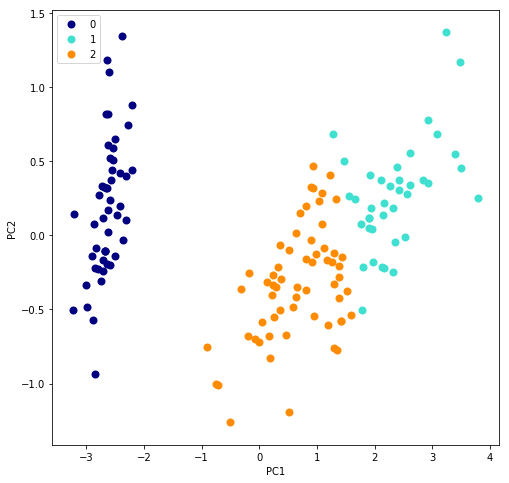

In [45]:
import matplotlib.pyplot as plt
???

## What if we want to figure out which samples went wrong?

Text(0,0.5,'PC2')

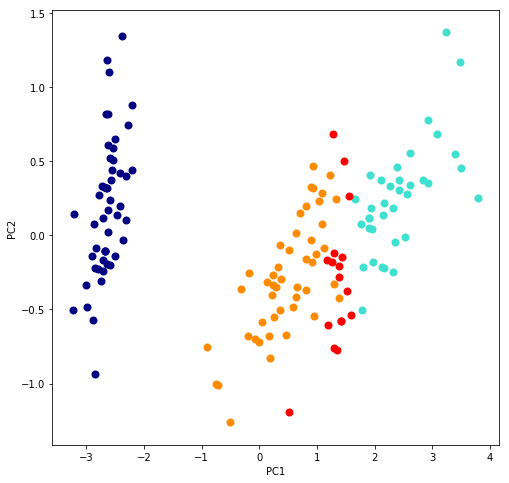

In [50]:
import matplotlib.pyplot as plt
colors = ['navy', 'turquoise', 'darkorange']
plt.figure(figsize=(8, 8))
cluster_names = ["0","1","2"]
matching = [0,2,1] # needed because 0=0, 1=2, 2=1
for color, c, cluster_name in zip(colors, [0,1,2], cluster_names):
    plt.scatter(pca_data[(kmeans.labels_ == c) & (iris.target == matching[c]), 0], 
                pca_data[(kmeans.labels_ == c) & (iris.target == matching[c]), 1],
                color=color, lw=2, label=cluster_name)
    incorrect_inxs = np.where((kmeans.labels_ == c) & (iris.target != matching[c]))[0]
    ???
    
plt.xlabel('PC1')
plt.ylabel('PC2')